In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-card-customer-churn-prediction' dataset.
Path to dataset files: /kaggle/input/credit-card-customer-churn-prediction


In [3]:
df = pd.read_csv(path + "/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [10]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [11]:
df= pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [15]:
X_train_Scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
# import libraries
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train_Scaled, y_train, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5603 - loss: 0.7031 - val_accuracy: 0.7962 - val_loss: 0.4900
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8034 - loss: 0.4685 - val_accuracy: 0.8056 - val_loss: 0.4497
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8035 - loss: 0.4499 - val_accuracy: 0.8044 - val_loss: 0.4341
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8164 - loss: 0.4193 - val_accuracy: 0.8094 - val_loss: 0.4251
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.4172 - val_accuracy: 0.8156 - val_loss: 0.4160
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8227 - loss: 0.4061 - val_accuracy: 0.8250 - val_loss: 0.4046
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8348 - loss: 0.3807 - val_accuracy: 0.8363 - val_loss: 0.3940
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.3699 - val_accuracy: 0.

In [21]:
model.layers[0].get_weights()

[array([[ 3.22968990e-01, -3.47994193e-02, -2.64681369e-01,
         -1.66428849e-01, -4.07567739e-01, -1.03243731e-01,
         -5.76263405e-02, -3.54786724e-01, -8.77954513e-02,
          5.51720969e-02, -2.77864933e-01],
        [-7.21342027e-01, -5.35456657e-01, -6.45949602e-01,
         -5.65170884e-01, -5.28377364e-04,  1.76743701e-01,
         -2.54824966e-01,  4.73979443e-01,  4.22803283e-01,
          1.86513402e-02,  2.15964362e-01],
        [-4.98766154e-01,  1.08779641e-02,  4.31977063e-01,
         -2.84906477e-01,  4.26661670e-01,  3.49722594e-01,
         -6.38495162e-02, -4.96418893e-01, -8.57756436e-02,
         -1.26327977e-01,  6.76297629e-03],
        [-6.08352311e-02,  3.85319516e-02, -7.03847766e-01,
          5.83995998e-01,  3.73279363e-01,  5.19957066e-01,
         -2.95189083e-01, -5.29115379e-01,  1.72225833e-01,
          3.99191648e-01,  2.48528153e-01],
        [ 3.72168988e-01, -2.05282077e-01,  3.53384227e-01,
         -2.52207160e-01,  9.97545794e-02, -

In [22]:
model.layers[1].get_weights()

[array([[ 0.27496597,  0.5501558 ,  0.16025153, -0.05599551, -0.17582674,
         -0.53990394, -0.16336994, -0.31095496,  0.03584301, -0.34280327,
          0.581395  ],
        [ 0.30997935,  0.05446788,  0.14947467, -0.55455315, -0.59556085,
         -0.18457676, -0.08402246,  0.5318755 , -0.2356417 ,  0.17524101,
          0.3761095 ],
        [-0.6221807 , -0.21008451,  0.0789148 ,  0.10567617,  0.24940479,
         -0.5190106 ,  0.5098593 , -0.43602723,  0.1504529 , -0.13456917,
          0.68993443],
        [-0.04614722, -0.07929835, -0.59590256,  0.13171576,  0.16733383,
          0.19584975, -0.03033483, -0.20951776, -0.32472086,  0.53268605,
          0.27497202],
        [-0.20120613,  0.25274044,  0.06589489, -0.59713316,  0.00983609,
          0.48689577, -0.10530147, -0.56940275,  0.34758383,  0.13401331,
          0.13328168],
        [ 0.01904703,  0.52114415,  0.05163439,  0.03136383,  0.09096885,
          0.3890822 ,  0.37227672, -0.12370123, -0.06673404,  0.3572689

In [23]:
y_log = model.predict(X_test_Scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [24]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [25]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8615

In [27]:
history.history

{'accuracy': [0.690625011920929,
  0.7992187738418579,
  0.80859375,
  0.8145312666893005,
  0.8218749761581421,
  0.8310937285423279,
  0.8392187356948853,
  0.8439062237739563,
  0.850781261920929,
  0.85546875],
 'loss': [0.5972501039505005,
  0.46337321400642395,
  0.43579402565956116,
  0.4206995666027069,
  0.4086570739746094,
  0.39635512232780457,
  0.38305673003196716,
  0.37125179171562195,
  0.3624624013900757,
  0.35514530539512634],
 'val_accuracy': [0.7962499856948853,
  0.8056250214576721,
  0.8043749928474426,
  0.809374988079071,
  0.815625011920929,
  0.824999988079071,
  0.8362500071525574,
  0.8349999785423279,
  0.8387500047683716,
  0.8431249856948853],
 'val_loss': [0.49001404643058777,
  0.44974616169929504,
  0.43411511182785034,
  0.4251437485218048,
  0.4159758388996124,
  0.4045851230621338,
  0.3940480947494507,
  0.38483113050460815,
  0.37838485836982727,
  0.3743880093097687]}

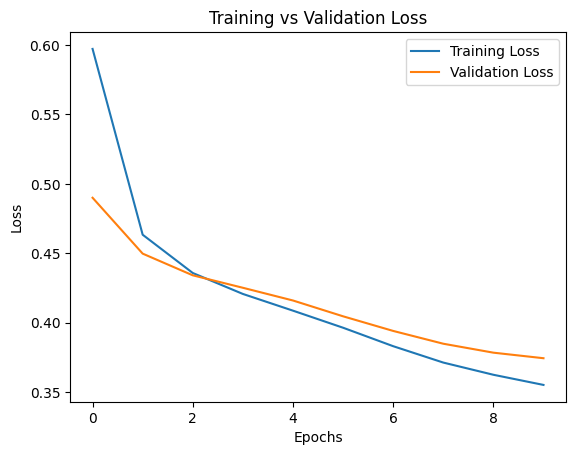

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

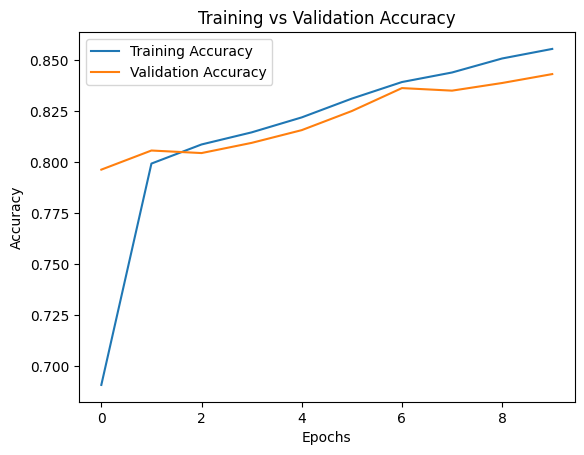

In [29]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()
